# K-Means Clustering

## Importing the libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

# this time there is no dependent variable to start with; we are going to generate them 
# the customer ID column is worthless and should be excluded
# to get a 2D chart, we will use only income and spending score (columns 3 and 4)
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

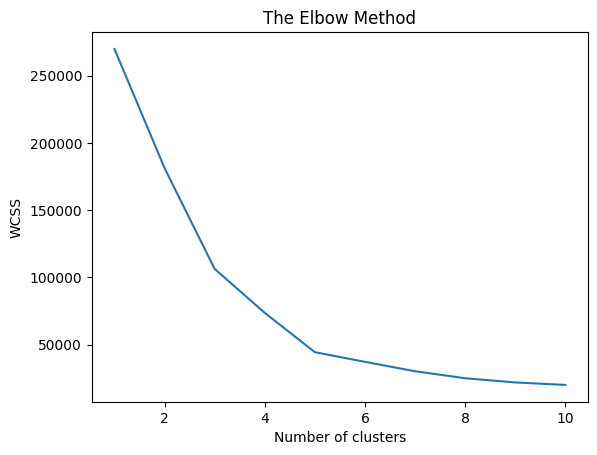

In [3]:
from sklearn.cluster import KMeans

# a for loop to fill the array with the result of 1 cluster, 2 clusters etc)
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters= i, init= "k-means++", random_state=42) # a random seed of 42 supposedly brings luck
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range (1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-Means model on the dataset

In [4]:
# chose 5 clusters based on a visual examination of the Elbow Method graph
kmeans = KMeans(n_clusters= 5, init= "k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
print (y_kmeans)
# each list item is one customer in the order of the dataset; the number is the cluster they go into

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


## Visualizing the clusters

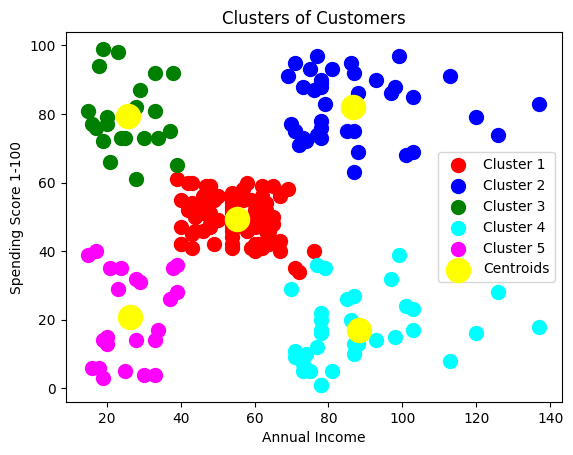

In [10]:
# this only selects the customers that the y_kmeans list has a 0 for (I don't totally understand this syntax)
# x axis is income, y axis is spending score
plt.scatter(X[y_kmeans == 0 ,0], X[y_kmeans == 0, 1], s=100, c= "red", label = "Cluster 1")
plt.scatter(X[y_kmeans == 1 ,0], X[y_kmeans == 1, 1], s=100, c= "blue", label = "Cluster 2")
plt.scatter(X[y_kmeans == 2 ,0], X[y_kmeans == 2, 1], s=100, c= "green", label = "Cluster 3")
plt.scatter(X[y_kmeans == 3 ,0], X[y_kmeans == 3, 1], s=100, c= "cyan", label = "Cluster 4")
plt.scatter(X[y_kmeans == 4 ,0], X[y_kmeans == 4, 1], s=100, c= "magenta", label = "Cluster 5")
# plotting the centeroids means taking the cluster_centers value of the kmeans object, columns 0 for x and 1 for y
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = "yellow", label = "Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score 1-100")
plt.legend()
plt.show()
